In [2]:
!ls *.xvg

md_rmsd.xvg	  npt_pressure.xvg     nvt_temperature.xvg
npt_density.xvg   npt_temperature.xvg  nvt_totalenergy.xvg
npt_enthalpy.xvg  nvt_pressure.xvg     potential.xvg


In [3]:
import numpy as np
import matplotlib.pyplot as plt

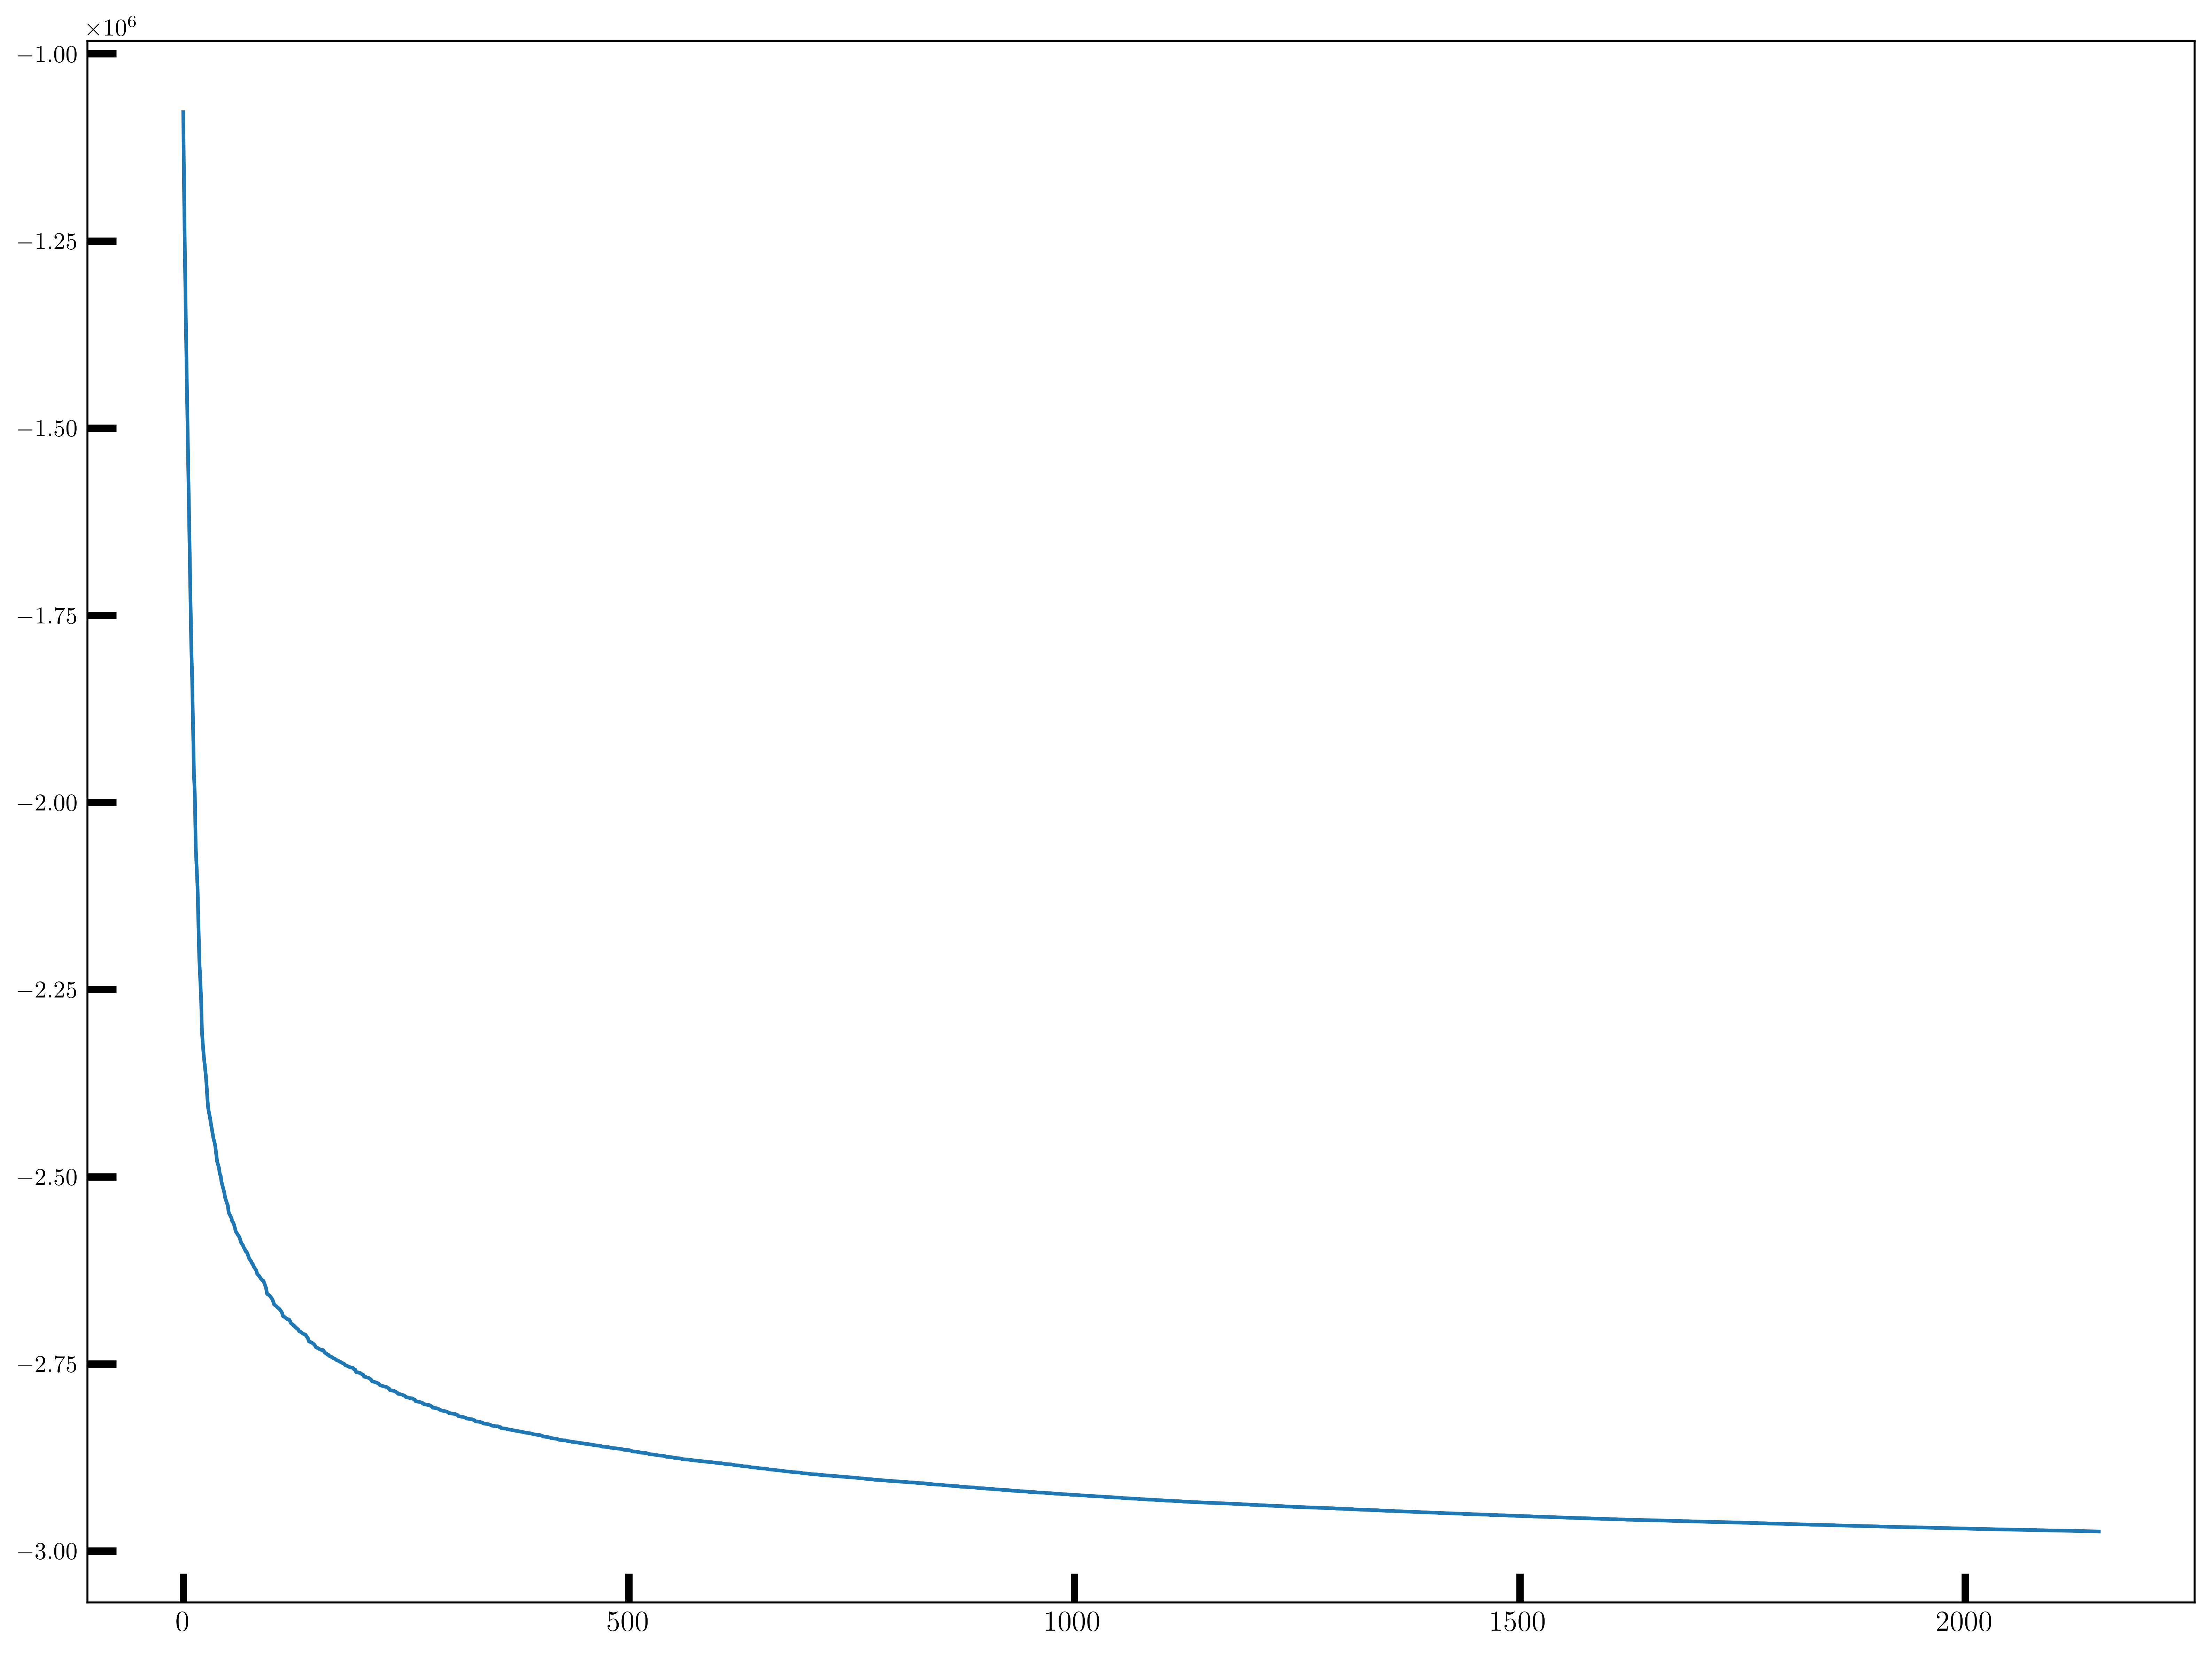

In [3]:
xvg_e = "potential.xvg"
x, e = np.loadtxt(xvg_e, comments=['#','@'], unpack=True)
plt.plot(x,e)

Text(0, 0.5, 'Temp (K)')

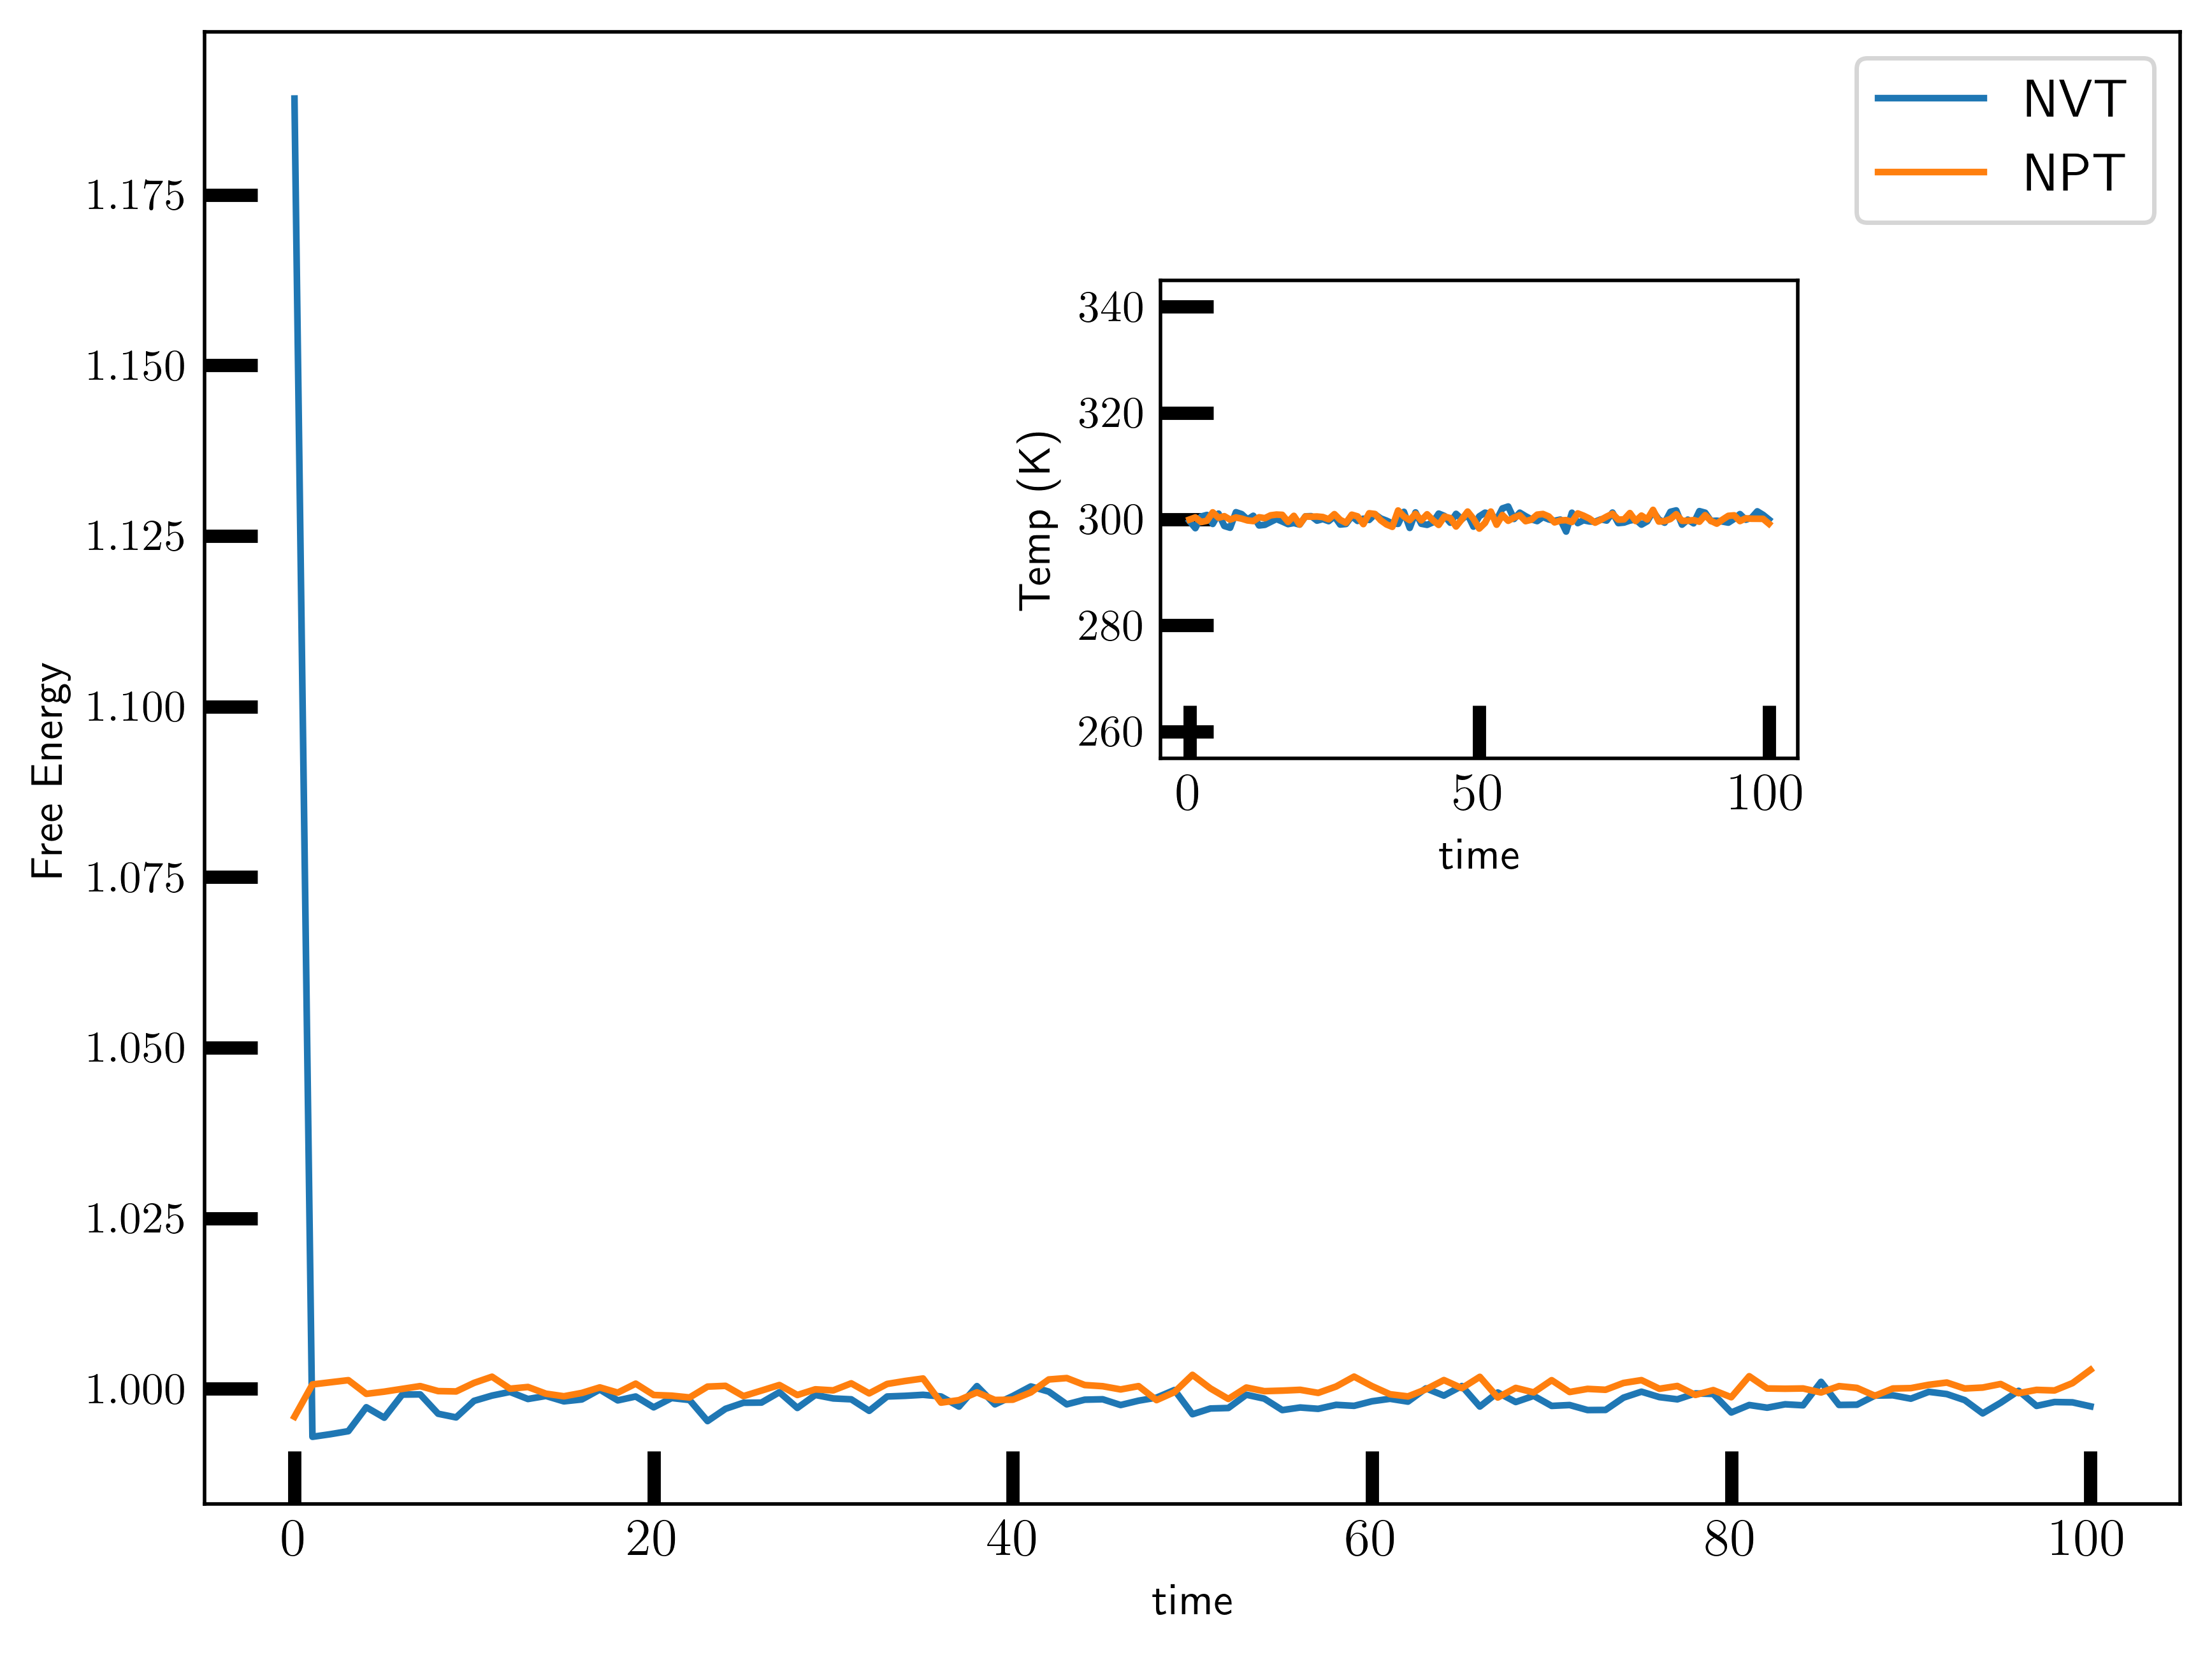

In [7]:
nvt_pfname = "nvt_pressure.xvg"  
nvt_tfname = "nvt_temperature.xvg"  
nvt_efname = "nvt_totalenergy.xvg"

t1, en = np.loadtxt(nvt_efname, comments=['#','@'], unpack=True)
en = en/np.average(en)

t2, tmp_nvt = np.loadtxt(nvt_tfname, comments=['#','@'], unpack=True)
t3, p = np.loadtxt(nvt_pfname, comments=['#','@'], unpack=True)

npt_rfname = "npt_density.xvg"  
npt_efname = "npt_enthalpy.xvg"  
npt_tfname = "npt_temperature.xvg"
t4, rho = np.loadtxt(npt_rfname, comments=['#','@'], unpack=True)
t5, enth = np.loadtxt(npt_efname, comments=['#','@'], unpack=True)
enth = enth/np.average(enth)
t6, tmp_npt = np.loadtxt(npt_tfname, comments=['#','@'], unpack=True)

fig, ax1 = plt.subplots(figsize=(8,6))
fig.set_tight_layout(False)

ax1.plot(t1, en, label='NVT')
ax1.plot(t5, enth, label='NPT')
ax1.set_xlabel('time')
ax1.set_ylabel('Free Energy (%-age)')
ax1.legend(loc='best')

left, bottom, width, height = [0.5, 0.5, 0.25, 0.25]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.plot(t2, tmp_nvt, label='NVT')
ax2.plot(t6, tmp_npt, label='NPT')
ax2.set_ylim((255,345))
ax2.set_xlabel('time')
ax2.set_ylabel('Temp (K)')

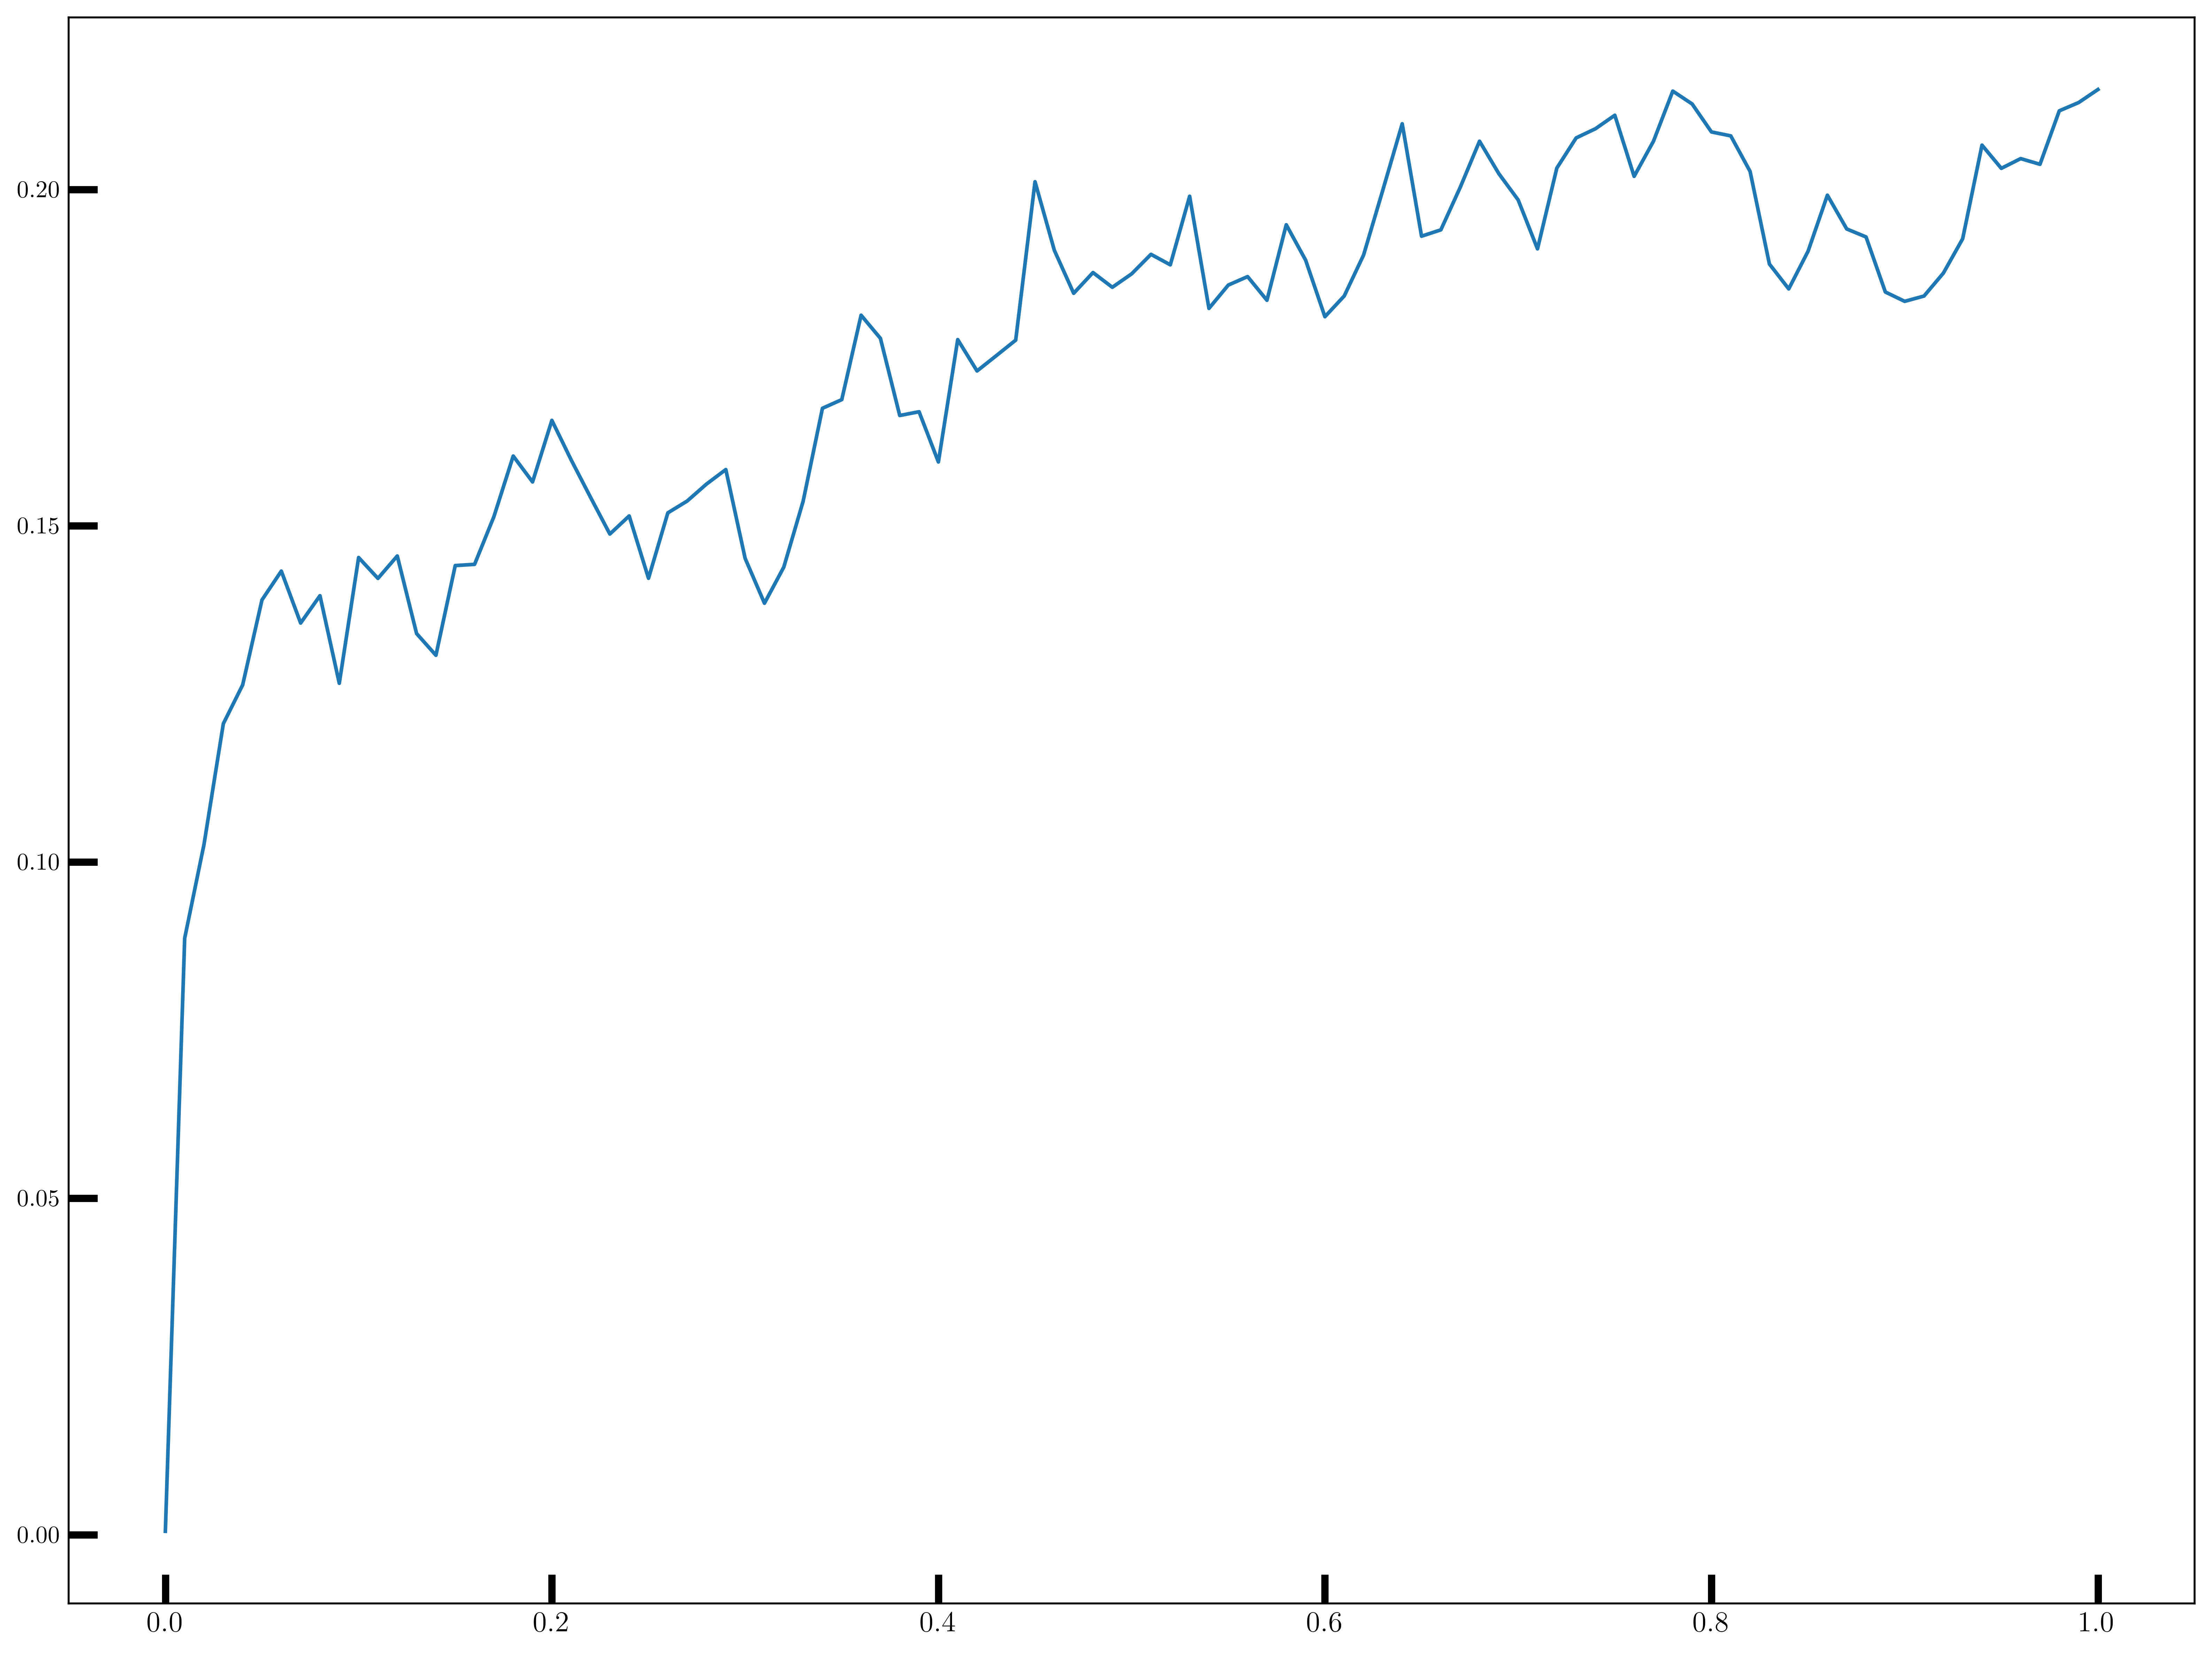

In [4]:
md_rmsfname = "md_rmsd.xvg"
t, rms = np.loadtxt(md_rmsfname, comments=['#','@'], unpack=True)
plt.plot(t,rms)